Dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv

In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings,random,scipy.stats as stats,statistics
warnings.filterwarnings('ignore')
pd.options.display.max_columns=50
pd.options.display.max_rows=100

In [2]:
df=pd.read_csv(r"A:\datasets\Airline\test.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
df.shape

(25976, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


### DROP 'Unnamed: 0'	, 'id'
These two columns are completely unique

In [6]:
print(df.shape)
df.drop(['Unnamed: 0' , 'id'],axis=1,inplace=True)
print(df.shape)

(25976, 25)
(25976, 23)


In [7]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include='object').columns
num_cols,cat_cols

(Index(['Age', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes',
        'Arrival Delay in Minutes'],
       dtype='object'),
 Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object'))

In [8]:
num_null_cols=[]
for i in num_cols:
    if df[i].isnull().sum()>0:
        num_null_cols.append(i)

cat_null_cols=[]
for i in cat_cols:
    if df[i].isnull().sum()>0:
        cat_null_cols.append(i)
print(num_null_cols)
print(cat_null_cols)

['Arrival Delay in Minutes']
[]


In [9]:
outlier_cols=[]
for i in num_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.25)-(1.5*iqr)
    higher_range=df[i].quantile(0.75)+(1.5*iqr)
    if df[i][df[i]<lower_range].count()>0 or df[i][df[i]>higher_range].count()>0:
        outlier_cols.append(i)
print(outlier_cols)
    
    

['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


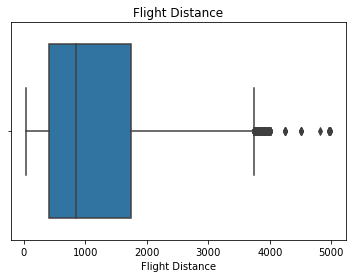

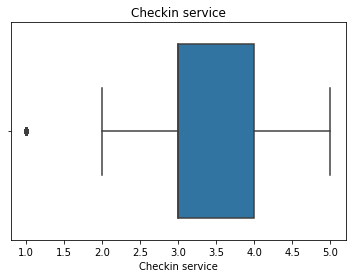

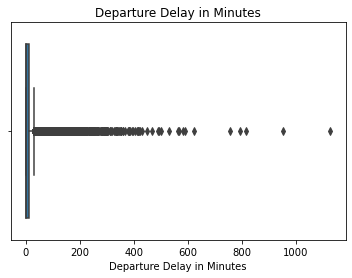

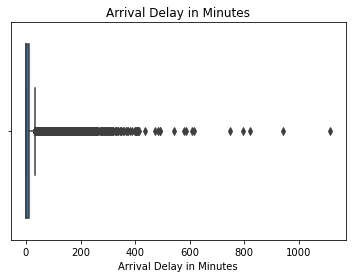

In [10]:
for i in outlier_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

## Null Imputation

In [11]:
for i in num_null_cols:
    if i in outlier_cols:
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].mean())


#### Cross-verifying- Null values

In [12]:
for i in num_null_cols:
    print(df[i].isnull().sum())

0


## Outlier Imputation

In [13]:
for i in outlier_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.25)-(1.5*iqr)
    higher_range=df[i].quantile(0.75)+(1.5*iqr)
    replace_higher_value=df[i].quantile(0.9)
    replace_lower_value=df[i].quantile(0.1)
    outliers_treated=np.where(df[i]>higher_range,replace_higher_value,df[i])
    df[i]=pd.DataFrame(outliers_treated)
    outliers_treated=np.where(df[i]<lower_range,replace_lower_value,df[i])
    df[i]=pd.DataFrame(outliers_treated)        

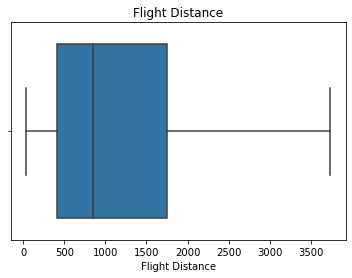

----------------------------------------------------------


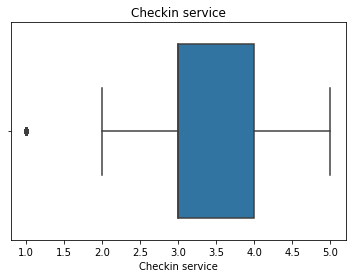

----------------------------------------------------------


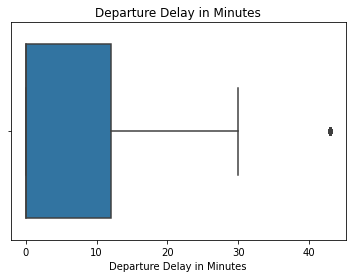

----------------------------------------------------------


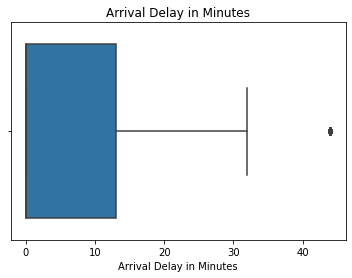

----------------------------------------------------------


In [14]:
for i in outlier_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    print('----------------------------------------------------------')

#### Cross-verifying- Outliers

In [15]:
for i in outlier_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.1)-(1.5*iqr)
    higher_range=df[i].quantile(0.9)+(1.5*iqr)
    if df[i][df[i]<lower_range].count()>0 or df[i][df[i]>higher_range].count()>0:
        print(i,True)
    else:
        print(i,False)

Flight Distance False
Checkin service False
Departure Delay in Minutes False
Arrival Delay in Minutes False


## Univariate Analysis

Column Name: Gender
value_counts: Female    13172
Male      12804
Name: Gender, dtype: int64
no. of unique values: 2


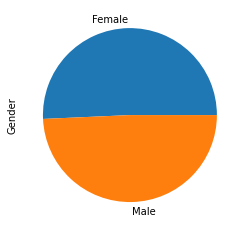

---------------------------------------------
Column Name: Customer Type
value_counts: Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64
no. of unique values: 2


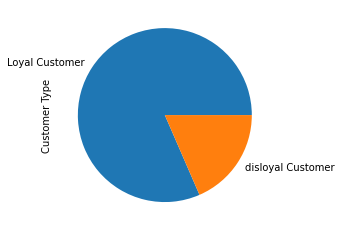

---------------------------------------------
Column Name: Age
39    723
25    713
40    635
41    633
43    626
44    622
45    600
27    595
23    589
48    580
22    580
37    565
49    563
46    562
42    560
47    559
24    558
38    557
36    548
52    540
54    535
26    533
29    503
51    503
50    502
30    491
33    483
35    475
57    475
55    473
53    473
59    462
56    452
58    448
34    445
28    441
60    418
31    400
21    395
32    358
20    358
16    257
18    245
17    241
61    239
62    228
19    206
65    196
66    191
64    190
15    188
63    186
68    175
13    173
9     167
67    163
11    159
12    159
8     157
69    153
14    153
70    149
10    139
7     123
72     48
80     32
71     20
77     19
73     16
76     15
75     15
74     14
78     11
79     10
85      8
Name: Age, dtype: int64
no. of unique values: 75


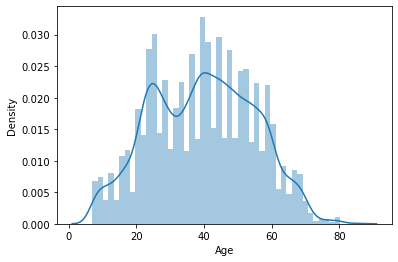

---------------------------------------------
Column Name: Type of Travel
value_counts: Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64
no. of unique values: 2


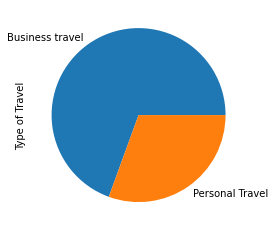

---------------------------------------------
Column Name: Class
value_counts: Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64
no. of unique values: 3


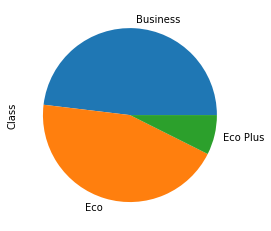

---------------------------------------------
Column Name: Flight Distance
2758.5    584
337.0     181
594.0     110
862.0     104
2475.0    101
         ... 
2637.0      1
2887.0      1
2566.0      1
2285.0      1
1809.0      1
Name: Flight Distance, Length: 3046, dtype: int64
no. of unique values: 3046


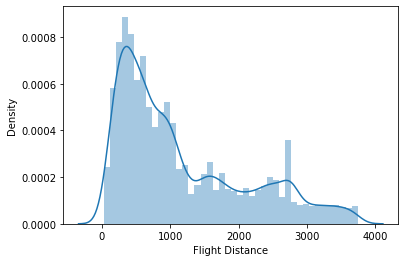

---------------------------------------------
Column Name: Inflight wifi service
2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64
no. of unique values: 6


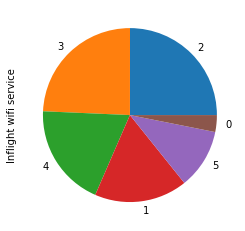

---------------------------------------------
Column Name: Departure/Arrival time convenient
4    6334
5    5595
3    4412
2    4343
1    3911
0    1381
Name: Departure/Arrival time convenient, dtype: int64
no. of unique values: 6


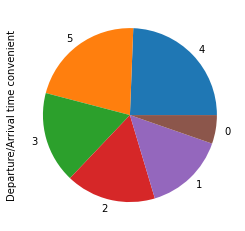

---------------------------------------------
Column Name: Ease of Online booking
2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64
no. of unique values: 6


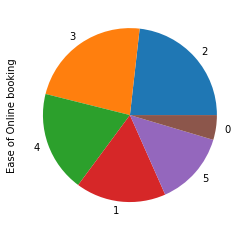

---------------------------------------------
Column Name: Gate location
value_counts: 3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64
no. of unique values: 5


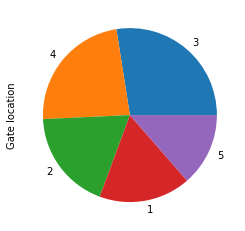

---------------------------------------------
Column Name: Food and drink
4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64
no. of unique values: 6


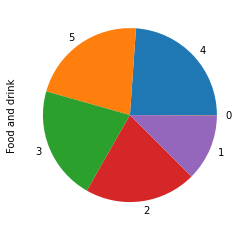

---------------------------------------------
Column Name: Online boarding
4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64
no. of unique values: 6


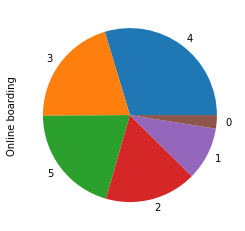

---------------------------------------------
Column Name: Seat comfort
value_counts: 4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64
no. of unique values: 5


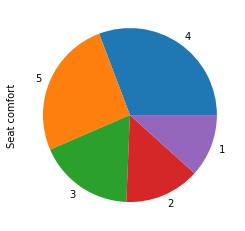

---------------------------------------------
Column Name: Inflight entertainment
4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64
no. of unique values: 6


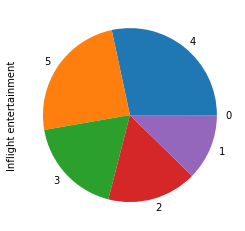

---------------------------------------------
Column Name: On-board service
4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64
no. of unique values: 6


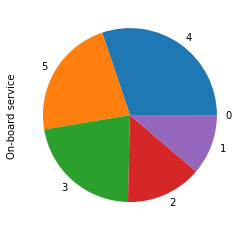

---------------------------------------------
Column Name: Leg room service
4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Leg room service, dtype: int64
no. of unique values: 6


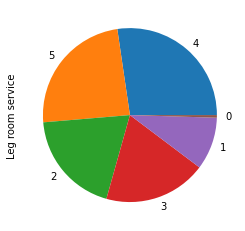

---------------------------------------------
Column Name: Baggage handling
value_counts: 4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64
no. of unique values: 5


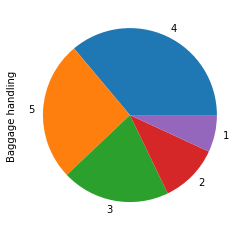

---------------------------------------------
Column Name: Checkin service
value_counts: 4.0    7278
3.0    7007
5.0    5264
1.0    3218
2.0    3209
Name: Checkin service, dtype: int64
no. of unique values: 5


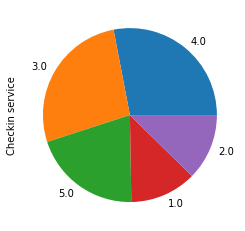

---------------------------------------------
Column Name: Inflight service
4    9378
5    6950
3    5017
2    2851
1    1778
0       2
Name: Inflight service, dtype: int64
no. of unique values: 6


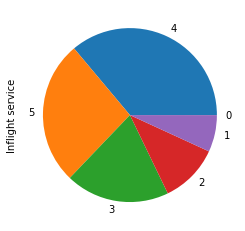

---------------------------------------------
Column Name: Cleanliness
4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: Cleanliness, dtype: int64
no. of unique values: 6


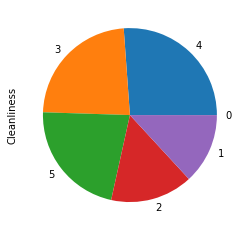

---------------------------------------------
Column Name: Departure Delay in Minutes
0.0     14688
43.0     3569
1.0       734
2.0       581
3.0       526
4.0       455
5.0       444
6.0       367
7.0       356
8.0       323
10.0      306
9.0       297
12.0      248
14.0      244
11.0      244
15.0      241
13.0      237
17.0      210
16.0      183
18.0      178
20.0      172
19.0      150
21.0      143
23.0      140
22.0      138
24.0      137
25.0      123
26.0      123
29.0      122
27.0      106
28.0       98
30.0       93
Name: Departure Delay in Minutes, dtype: int64
no. of unique values: 32


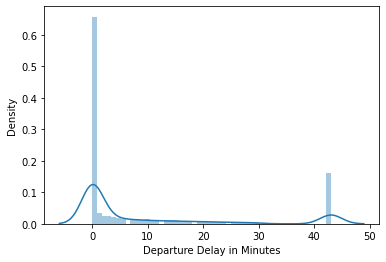

---------------------------------------------
Column Name: Arrival Delay in Minutes
0.0     14677
44.0     3538
1.0       536
2.0       523
3.0       490
4.0       466
5.0       425
6.0       405
8.0       357
7.0       313
11.0      309
9.0       302
12.0      289
10.0      285
13.0      282
17.0      211
14.0      205
16.0      201
18.0      196
15.0      189
19.0      185
20.0      165
21.0      156
22.0      155
25.0      135
24.0      130
28.0      126
23.0      122
27.0      118
29.0      113
26.0      104
30.0       93
32.0       91
31.0       84
Name: Arrival Delay in Minutes, dtype: int64
no. of unique values: 34


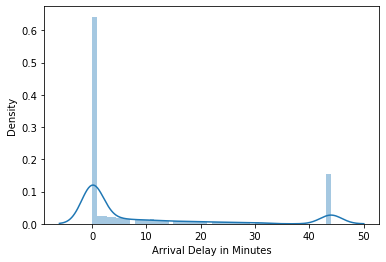

---------------------------------------------
Column Name: satisfaction
value_counts: neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64
no. of unique values: 2


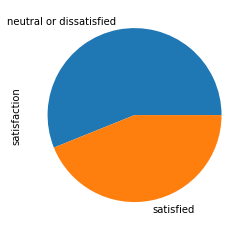

---------------------------------------------


In [16]:
for i in df.columns.tolist():
    print('Column Name:',i)
    if df[i].nunique()<6:
        print('value_counts:',df[i].value_counts())
    else:
        print(df[i].value_counts())
    print('no. of unique values:',df[i].nunique())
    if df[i].nunique() <= 6:
        df[i].value_counts().plot(kind='pie')
        plt.show()
        
    else:
        sns.distplot(df[i])
        plt.show()
    print('---------------------------------------------')

## Error: value_counts()[:5] 
Key error: 5

## Bivarient Analysis

<AxesSubplot:>

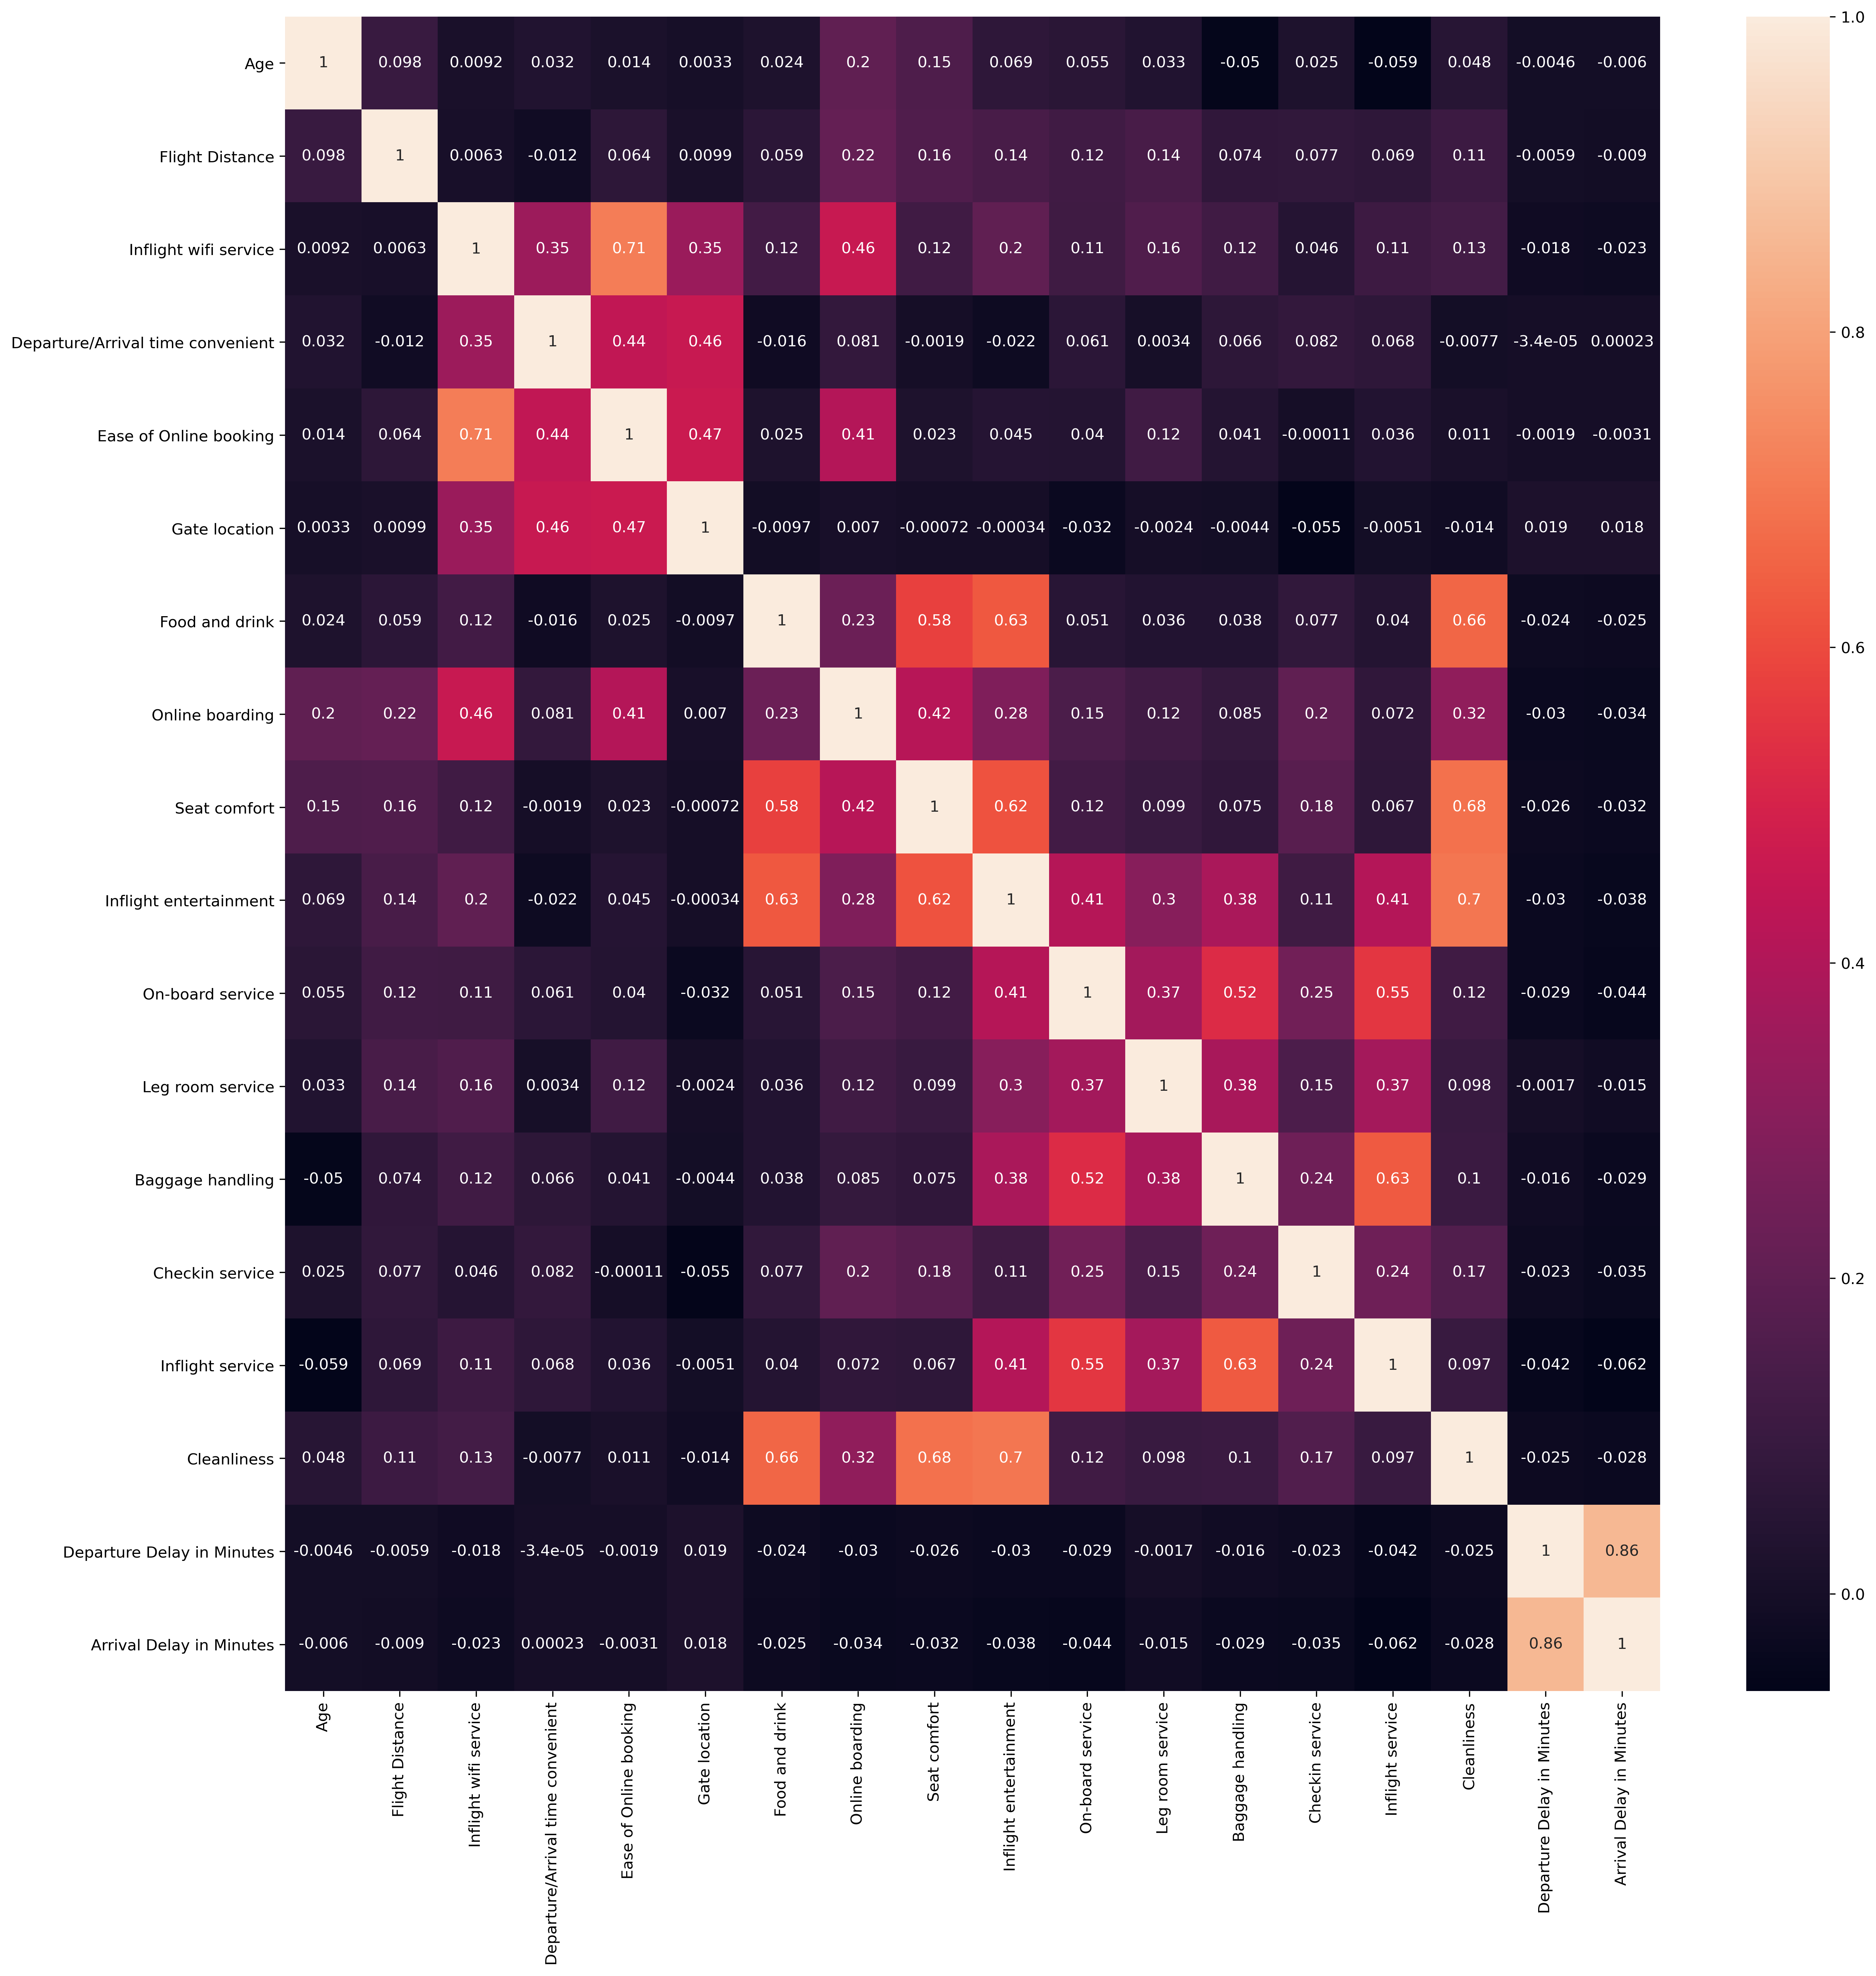

In [17]:
plt.figure(dpi=300,figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [18]:
correlation=[]
for i in df.select_dtypes(include=['int64','float64']).columns:
    for j in df.select_dtypes(include=['int64','float64']).columns:        
        corr=np.corrcoef(df[i].values,df[j].values)[0][1]
        if not 0.9<corr<=1:
            if corr>0.5:
                correlation.append([i,j])

In [19]:
len(correlation)

22

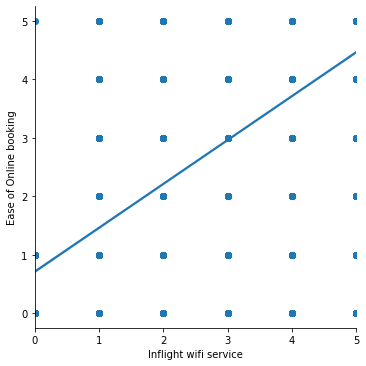

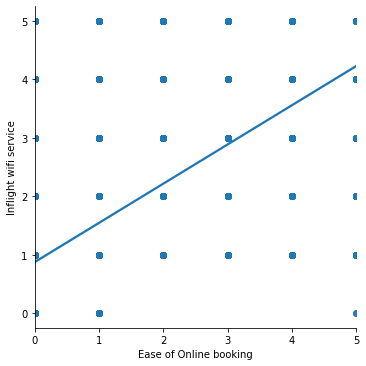

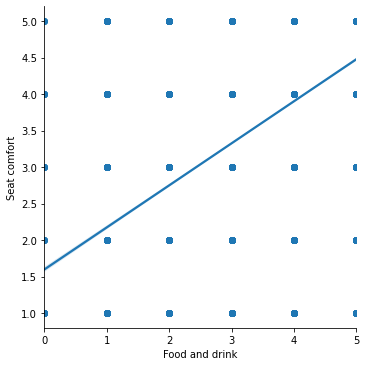

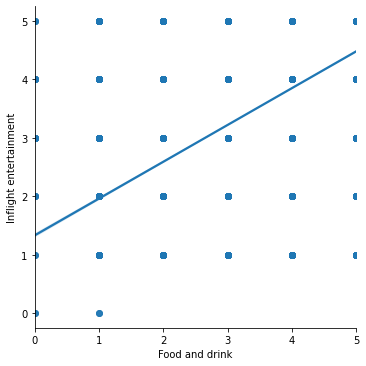

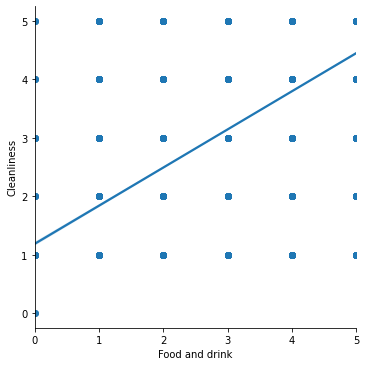

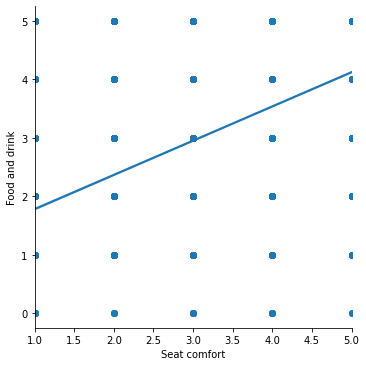

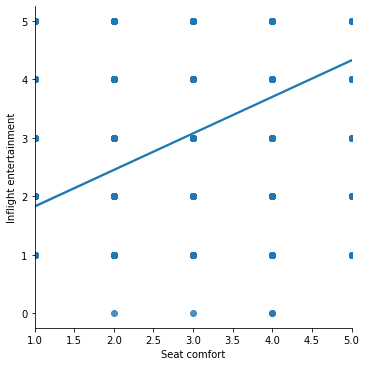

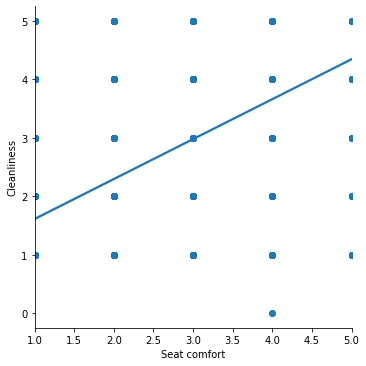

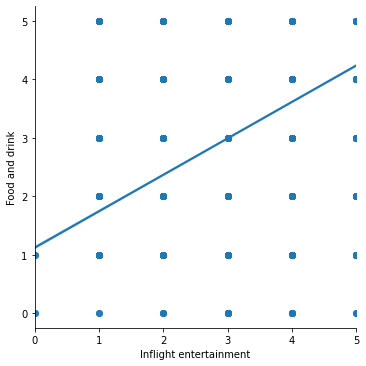

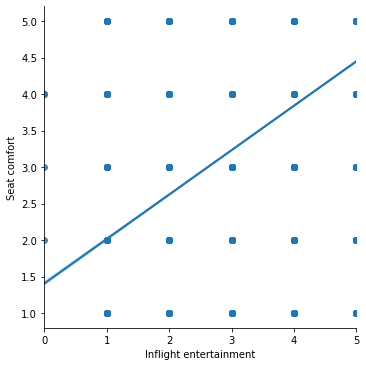

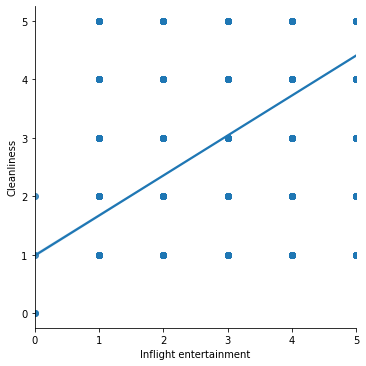

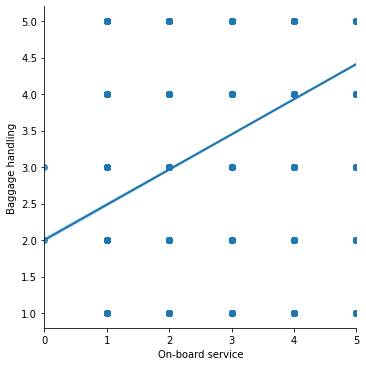

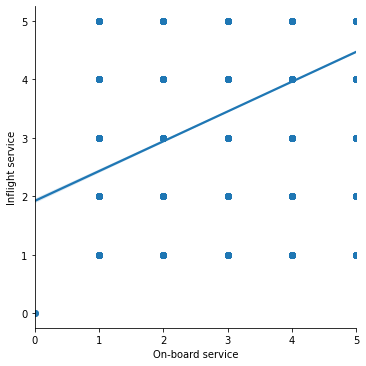

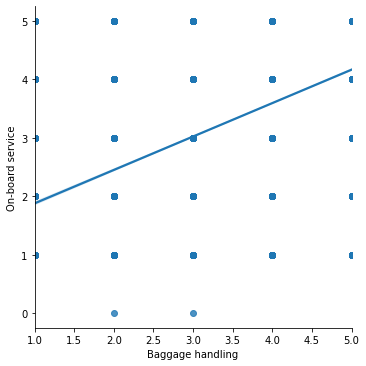

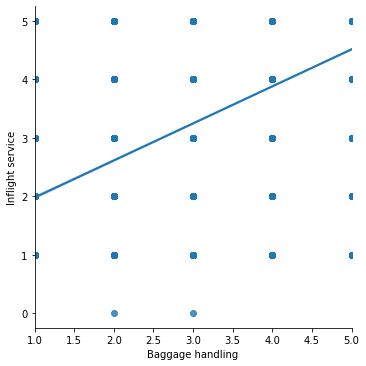

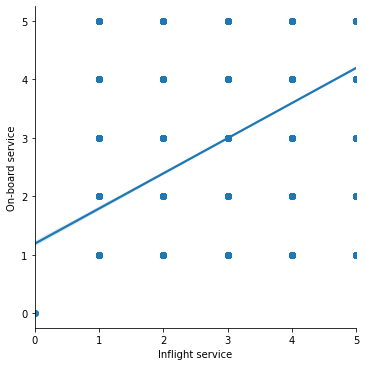

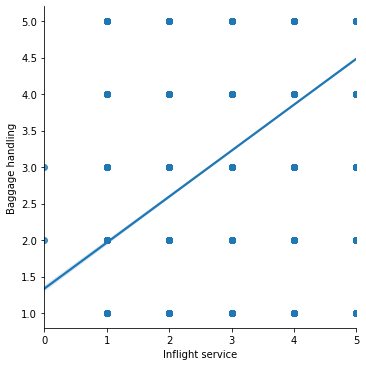

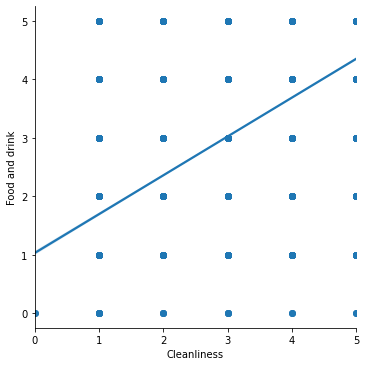

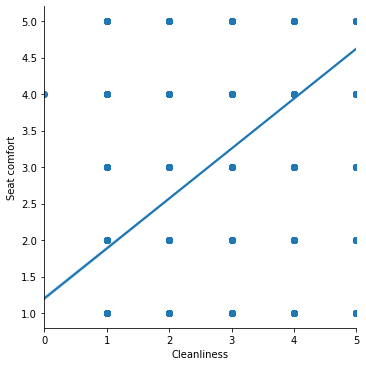

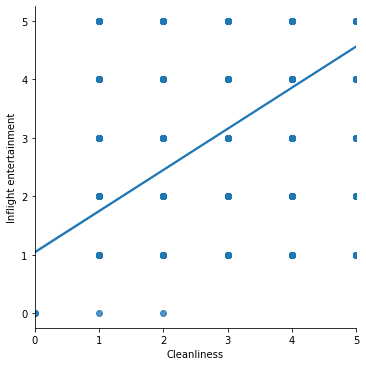

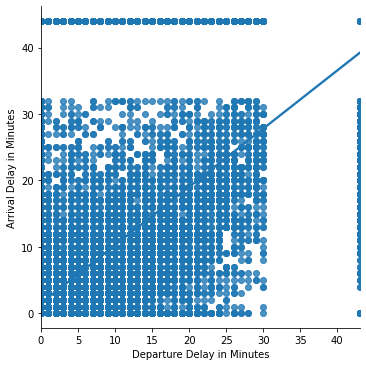

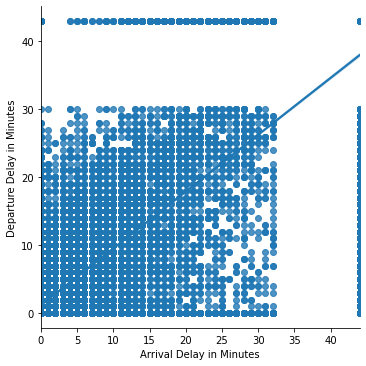

In [20]:
for i in correlation:
    sns.lmplot(i[0],i[1],data=df)
    plt.show()

In [21]:
cont = []
disc = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        if df[i].nunique() < 10:
            disc.append(i)
        else:
            cont.append(i)

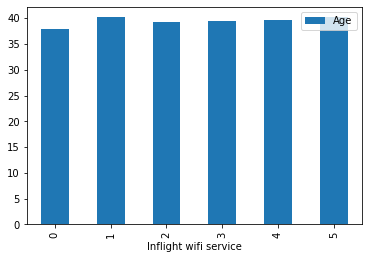

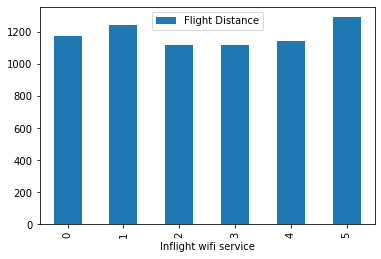

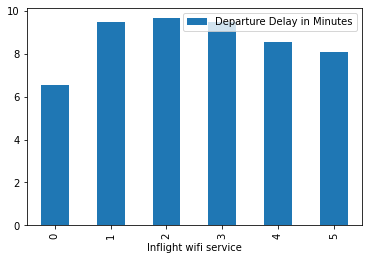

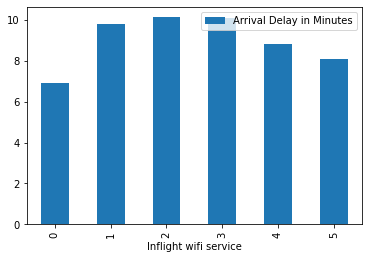

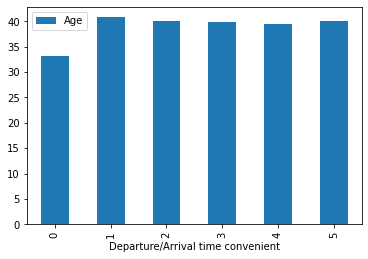

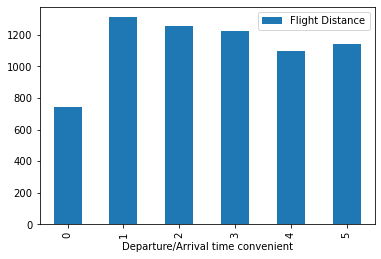

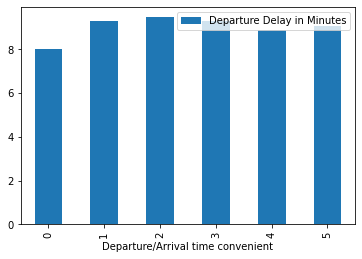

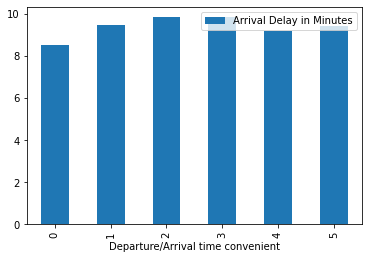

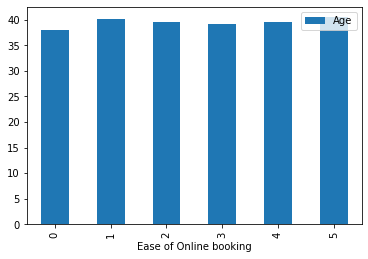

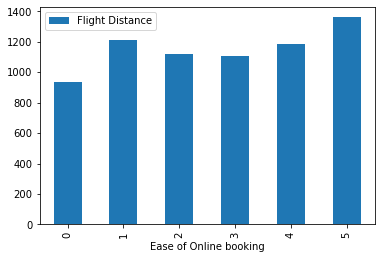

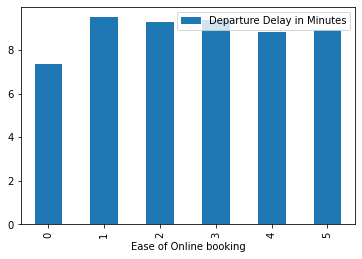

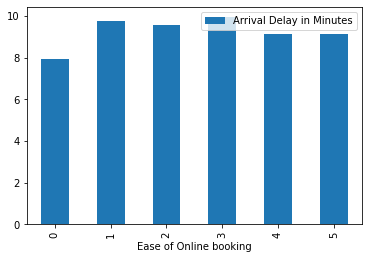

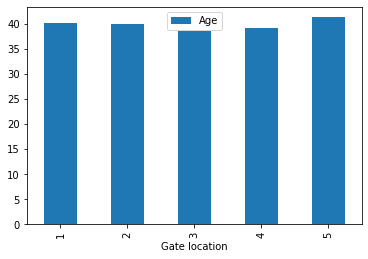

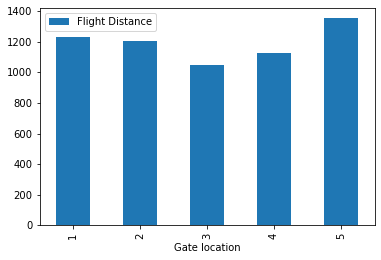

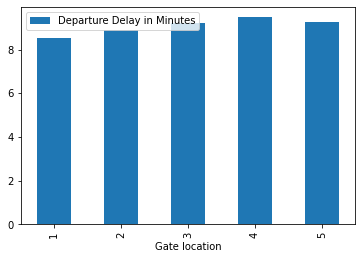

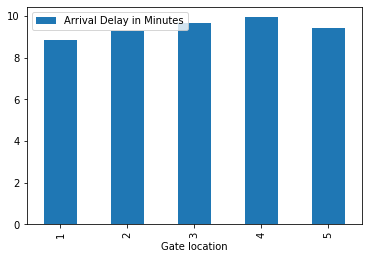

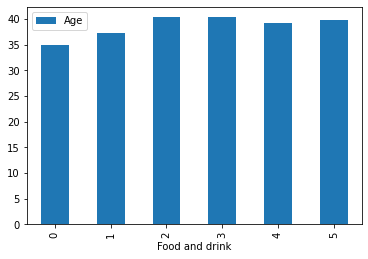

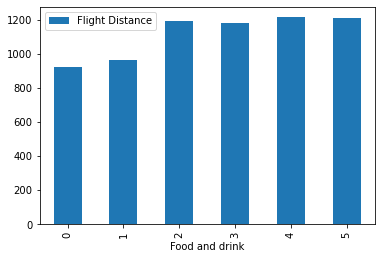

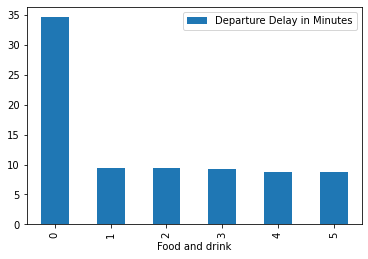

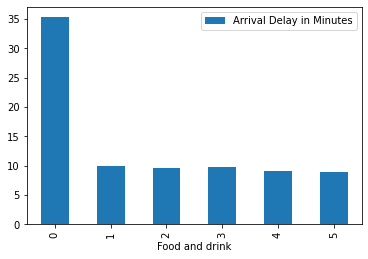

In [22]:
for i in disc[:5]:
    for j in cont[:5]:
        df.pivot_table(index=i,values=[j],aggfunc='mean').plot(kind='bar')
        plt.show()

In [23]:
df.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.098292,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004571,-0.006017
Flight Distance,0.098292,1.000000,0.006295,-0.011975,0.064096,0.009893,0.058922,0.216090,0.160210,0.139068,0.119862,0.138948,0.073796,0.077441,0.069130,0.106596,-0.005944,-0.008983
Inflight wifi service,0.009242,0.006295,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.018089,-0.022571
Departure/Arrival time convenient,0.032449,-0.011975,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000034,0.000229
Ease of Online booking,0.013565,0.064096,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001876,-0.003121
Gate location,0.003308,0.009893,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.018966,0.018049
Food and drink,0.023841,0.058922,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.023725,-0.025030
Online boarding,0.202058,0.216090,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.029830,-0.034479
Seat comfort,0.154507,0.160210,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.026301,-0.032257
Inflight entertainment,0.068998,0.139068,0.201782,-0.022326,0.044715,-0.000340,0.627265,0.279391,0.616817,1.000000,0.412266,0.303203,0.382782,0.114343,0.411018,0.695269,-0.029668,-0.037962


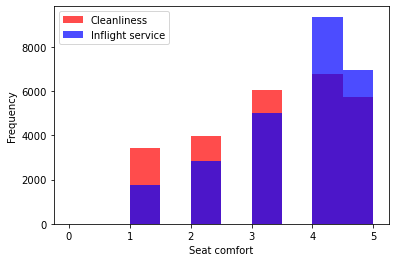

In [24]:
df.plot(x="Seat comfort", y=["Cleanliness", "Inflight service"], kind='hist',color=['red','blue'],alpha=0.7)
plt.xlabel('Seat comfort')
plt.show()

In [25]:
df['satisfaction'] = df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied': 0})

In [26]:
df[['satisfaction','Cleanliness']].value_counts()

satisfaction  Cleanliness
1             4              3633
              5              3591
0             3              3409
              4              3157
              2              3140
              1              2729
1             3              2656
0             5              2136
1             2               841
              1               682
0             0                 2
dtype: int64

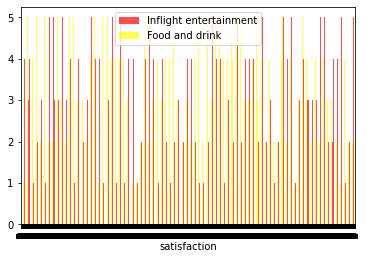

In [27]:
df.iloc[0::10].plot(x="satisfaction", y=["Inflight entertainment", "Food and drink"], kind='bar',color=['red','yellow'],alpha=0.7)
plt.show()

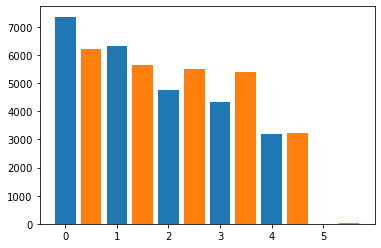

In [28]:
df[["Inflight entertainment"]].value_counts()
df[["Food and drink"]].value_counts().values
x=np.arange(6)
y1=df[["Inflight entertainment"]].value_counts().values.tolist()
y2=df[["Food and drink"]].value_counts().values.tolist()
plt.bar(x,y1,width=0.4)
plt.bar(x+0.5,y2,width=0.4)
plt.show()

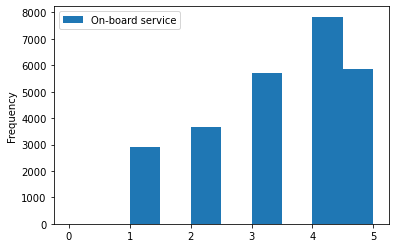

In [29]:
df.plot(x='satisfaction',y='On-board service',kind='hist')
plt.show()

In [30]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,43.0,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,5,4,5,4,4,4,4,3.0,4,5,0.0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192.0,2,0,2,4,2,2,2,2,4,1,3,2.0,2,2,0.0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377.0,0,0,0,2,3,4,4,1,1,1,1,3.0,1,4,0.0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,4,1,2,2,2,2,2,4.0,2,4,0.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526.0,3,3,3,1,4,3,4,4,3,2,4,4.0,5,4,0.0,0.0,0
25972,Male,Loyal Customer,23,Business travel,Business,646.0,4,4,4,4,4,4,4,4,4,5,5,5.0,5,4,0.0,0.0,1
25973,Female,Loyal Customer,17,Personal Travel,Eco,828.0,2,5,1,5,2,1,2,2,4,3,4,5.0,4,2,0.0,0.0,0
25974,Male,Loyal Customer,14,Business travel,Business,1127.0,3,3,3,3,4,4,4,4,3,2,5,4.0,5,4,0.0,0.0,1


In [45]:
df1=df[df['satisfaction']==1]
df0=df[df['satisfaction']==0]

In [43]:
df1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160.0,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,43.0,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863.0,1,1,3,1,5,4,5,4,4,4,4,3.0,4,5,0.0,0.0,1
3,Male,Loyal Customer,44,Business travel,Business,3377.0,0,0,0,2,3,4,4,1,1,1,1,3.0,1,4,0.0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182.0,2,3,4,3,4,1,2,2,2,2,2,4.0,2,4,0.0,20.0,1
5,Male,Loyal Customer,16,Business travel,Eco,311.0,3,3,3,3,5,5,3,5,4,3,1,1.0,2,5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25956,Female,Loyal Customer,29,Business travel,Business,2864.0,5,5,5,5,3,3,3,3,5,5,5,3.0,5,3,0.0,0.0,1
25961,Male,Loyal Customer,51,Business travel,Business,2296.0,3,3,3,3,5,5,4,5,5,5,5,3.0,5,3,2.0,0.0,1
25969,Male,Loyal Customer,52,Business travel,Business,280.0,3,3,3,3,3,4,4,4,4,4,4,3.0,4,3,0.0,0.0,1
25972,Male,Loyal Customer,23,Business travel,Business,646.0,4,4,4,4,4,4,4,4,4,5,5,5.0,5,4,0.0,0.0,1


In [44]:
df0

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,Male,disloyal Customer,20,Business travel,Eco,192.0,2,0,2,4,2,2,2,2,4,1,3,2.0,2,2,0.0,0.0,0
11,Female,Loyal Customer,33,Business travel,Business,325.0,2,5,5,5,1,3,4,2,2,2,2,3.0,2,4,18.0,7.0,0
15,Male,Loyal Customer,50,Personal Travel,Eco,83.0,3,4,0,3,2,0,2,2,4,2,4,4.0,5,2,5.0,2.0,0
16,Female,Loyal Customer,31,Business travel,Eco,728.0,2,5,5,5,2,2,2,2,4,3,3,4.0,3,2,2.0,0.0,0
18,Female,Loyal Customer,43,Personal Travel,Eco,1927.0,3,4,3,1,4,4,5,5,5,3,5,4.0,5,3,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,Male,Loyal Customer,41,Business travel,Eco,692.0,2,2,2,2,2,2,2,2,2,3,3,2.0,3,2,15.0,3.0,0
25970,Female,disloyal Customer,36,Business travel,Eco,432.0,1,5,1,3,4,1,4,4,5,2,5,2.0,3,4,0.0,0.0,0
25971,Male,disloyal Customer,34,Business travel,Business,526.0,3,3,3,1,4,3,4,4,3,2,4,4.0,5,4,0.0,0.0,0
25973,Female,Loyal Customer,17,Personal Travel,Eco,828.0,2,5,1,5,2,1,2,2,4,3,4,5.0,4,2,0.0,0.0,0


In [41]:
lst=['Departure/Arrival time convenient','Ease of Online booking','Inflight wifi service','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
for i in lst:
    print(df1[i].value_counts())
    print('^^^^^^^^1^^^^^^^^^^')
    print(df0[i].value_counts())
    print('--------------------------------------------------------')

4    2483
5    2363
1    1977
3    1966
2    1920
0     694
Name: Departure/Arrival time convenient, dtype: int64
^^^^^^^^1^^^^^^^^^^
4    3851
5    3232
3    2446
2    2423
1    1934
0     687
Name: Departure/Arrival time convenient, dtype: int64
--------------------------------------------------------
4    2604
5    2575
3    1888
2    1819
1    1715
0     802
Name: Ease of Online booking, dtype: int64
^^^^^^^^1^^^^^^^^^^
2    4211
3    4056
1    2646
4    2269
5     998
0     393
Name: Ease of Online booking, dtype: int64
--------------------------------------------------------
4    3028
5    2852
3    1623
2    1567
1    1522
0     811
Name: Inflight wifi service, dtype: int64
^^^^^^^^1^^^^^^^^^^
2    4923
3    4694
1    2966
4    1953
5      35
0       2
Name: Inflight wifi service, dtype: int64
--------------------------------------------------------
4    3283
5    3151
3    2207
2    2122
1     635
0       5
Name: Food and drink, dtype: int64
^^^^^^^^1^^^^^^^^^^
3    3287
2    3

### Low rating is directly impacting on the satisfaction
    Ease of Online booking
    flight wifi service
    Online boarding
    Inflight entertainment
    Leg room service

### Rating is not mattering much
    Seat comfort
    Food and drink
    On-board service
    Baggage handling
    Checkin service
    Inflight service
    Cleanliness